In [639]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Set all the options

In [640]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

Read the data


In [641]:
df = pd.read_csv("Leads.csv")

In [642]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Rename the columns

In [643]:
columns = {
    "Lead Origin": "origin",
    "Lead Source": "lead_source",
    "Total Time Spent on Website": "time_spent",
    "Page Views Per Visit": "num_page_per_visit",
    "Last Activity": "last_activity",
    "How did you hear about X Education": "hear_about_source",
    "What is your current occupation": "cur_occupation",
    "What matters most to you in choosing a course": "course_value",
    "Receive More Updates About Our Courses": "rcv_updates_course",
    "Lead Quality": "lead_quality",
    "Search": "search",
    "Magazine": "magazine",
    "Newspaper Article": "newspaper_article",
    "X Education Forums": "x_education_forum",
    "Newspaper": "newspaper",
    "Digital Advertisement": "digital_Advertisement",
    "Through Recommendations": "was_recommended",
    "Update me on Supply Chain Content": "rcv_updates_supplychain",
    "Get updates on DM Content": "rcv_updates_dm",
    "Lead Profile": "lead_profile",
    "Asymmetrique Activity Index": "asymetric_activity_index",
    "Asymmetrique Profile Index": "asymmetric_profile_index",
    "Asymmetrique Activity Score": "asymmetric_activity_score",
    "Asymmetrique Profile Score": "asymmetric_profile_score",
    "I agree to pay the amount through cheque": "agree_paymnt_cheque",
    "A free copy of Mastering The Interview": "free_copy_mastering_the_interview",
    "Last Notable Activity": "last_notable_activity",
    "Country": "country",
    "Specialization": "specialization"
}

In [644]:
df.rename(columns = columns, inplace = True)

In [645]:
df.head()

,Prospect ID,Lead Number,origin,lead_source,Do Not Email,Do Not Call,Converted,TotalVisits,time_spent,num_page_per_visit,last_activity,country,specialization,hear_about_source,cur_occupation,course_value,search,magazine,newspaper_article,x_education_forum,newspaper,digital_Advertisement,was_recommended,rcv_updates_course,Tags,lead_quality,rcv_updates_supplychain,rcv_updates_dm,lead_profile,City,asymetric_activity_index,asymmetric_profile_index,asymmetric_activity_score,asymmetric_profile_score,agree_paymnt_cheque,free_copy_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Inspect the data

In [646]:
df.shape

(9240, 37)

In [647]:
df.describe()

,Lead Number,Converted,TotalVisits,time_spent,num_page_per_visit,asymmetric_activity_score,asymmetric_profile_score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Prospect ID                        9240 non-null   object 
 1   Lead Number                        9240 non-null   int64  
 2   origin                             9240 non-null   object 
 3   lead_source                        9204 non-null   object 
 4   Do Not Email                       9240 non-null   object 
 5   Do Not Call                        9240 non-null   object 
 6   Converted                          9240 non-null   int64  
 7   TotalVisits                        9103 non-null   float64
 8   time_spent                         9240 non-null   int64  
 9   num_page_per_visit                 9103 non-null   float64
 10  last_activity                      9137 non-null   object 
 11  country                            6779 non-null   objec

### Data Cleaning 


Remove Prospect Id as already Lead Number is present and it can be used as Id for predicted and actual value comparison

In [649]:
df = df.drop(["Prospect ID"], axis = 1)

In [650]:
df.head()

,Lead Number,origin,lead_source,Do Not Email,Do Not Call,Converted,TotalVisits,time_spent,num_page_per_visit,last_activity,country,specialization,hear_about_source,cur_occupation,course_value,search,magazine,newspaper_article,x_education_forum,newspaper,digital_Advertisement,was_recommended,rcv_updates_course,Tags,lead_quality,rcv_updates_supplychain,rcv_updates_dm,lead_profile,City,asymetric_activity_index,asymmetric_profile_index,asymmetric_activity_score,asymmetric_profile_score,agree_paymnt_cheque,free_copy_mastering_the_interview,last_notable_activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [651]:
df.origin.value_counts()

origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

In [652]:
df.lead_source.value_counts()

lead_source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [653]:
df["Do Not Email"].value_counts()

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

In [654]:
df["Do Not Call"].value_counts()

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

This method converts yes / no to 1 / 0
- inverted: if true yes to 0 and no to 1

In [655]:
def yesno_to_01(x, inverted = False):
    temp = 0
    if inverted:
        temp = 0 if x == "yes" else 1
    else:
        temp = 1 if x == "yes" else 0
    return temp

In [656]:
df["Do Not Email"]  = df["Do Not Email"].apply(lambda x: yesno_to_01(x.lower(), inverted = True))

In [657]:
df["Do Not Email"].value_counts()

Do Not Email
1    8506
0     734
Name: count, dtype: int64

In [658]:
df["Do Not Email"].head()

0    1
1    1
2    1
3    1
4    1
Name: Do Not Email, dtype: int64

Before these columns were no and now it has been converted to true. Let's us rename column also as send_email

In [659]:
df.rename(columns = {"Do Not Email": "send_email"}, inplace = True)

In [660]:
df.head()

,Lead Number,origin,lead_source,send_email,Do Not Call,Converted,TotalVisits,time_spent,num_page_per_visit,last_activity,country,specialization,hear_about_source,cur_occupation,course_value,search,magazine,newspaper_article,x_education_forum,newspaper,digital_Advertisement,was_recommended,rcv_updates_course,Tags,lead_quality,rcv_updates_supplychain,rcv_updates_dm,lead_profile,City,asymetric_activity_index,asymmetric_profile_index,asymmetric_activity_score,asymmetric_profile_score,agree_paymnt_cheque,free_copy_mastering_the_interview,last_notable_activity
0,660737,API,Olark Chat,1,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,1,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,1,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,1,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Let us do same for Do Not Call

In [661]:
df["Do Not Call"]  = df["Do Not Call"].apply(lambda x: yesno_to_01(x.lower(), inverted = True))

In [662]:
df["Do Not Call"].value_counts()

Do Not Call
1    9238
0       2
Name: count, dtype: int64

In [663]:
df.head()

,Lead Number,origin,lead_source,send_email,Do Not Call,Converted,TotalVisits,time_spent,num_page_per_visit,last_activity,country,specialization,hear_about_source,cur_occupation,course_value,search,magazine,newspaper_article,x_education_forum,newspaper,digital_Advertisement,was_recommended,rcv_updates_course,Tags,lead_quality,rcv_updates_supplychain,rcv_updates_dm,lead_profile,City,asymetric_activity_index,asymmetric_profile_index,asymmetric_activity_score,asymmetric_profile_score,agree_paymnt_cheque,free_copy_mastering_the_interview,last_notable_activity
0,660737,API,Olark Chat,1,1,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,1,1,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,1,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,1,1,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,1,1,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [664]:
df.rename(columns = {"Do Not Call": "call"}, inplace = True)

In [665]:
df.head()

,Lead Number,origin,lead_source,send_email,call,Converted,TotalVisits,time_spent,num_page_per_visit,last_activity,country,specialization,hear_about_source,cur_occupation,course_value,search,magazine,newspaper_article,x_education_forum,newspaper,digital_Advertisement,was_recommended,rcv_updates_course,Tags,lead_quality,rcv_updates_supplychain,rcv_updates_dm,lead_profile,City,asymetric_activity_index,asymmetric_profile_index,asymmetric_activity_score,asymmetric_profile_score,agree_paymnt_cheque,free_copy_mastering_the_interview,last_notable_activity
0,660737,API,Olark Chat,1,1,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,1,1,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,1,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,1,1,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,1,1,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [666]:
df.last_activity.value_counts()

last_activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [667]:
df.country.isna().sum()

2461

In [668]:
null_percentage = df.country.isna().sum() / len(df.country) * 100
null_percentage

26.634199134199132

27% Null values almost. Not a good idea to drop the column at this stage

In [669]:
df.country.value_counts()

country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [670]:
df.head()

,Lead Number,origin,lead_source,send_email,call,Converted,TotalVisits,time_spent,num_page_per_visit,last_activity,country,specialization,hear_about_source,cur_occupation,course_value,search,magazine,newspaper_article,x_education_forum,newspaper,digital_Advertisement,was_recommended,rcv_updates_course,Tags,lead_quality,rcv_updates_supplychain,rcv_updates_dm,lead_profile,City,asymetric_activity_index,asymmetric_profile_index,asymmetric_activity_score,asymmetric_profile_score,agree_paymnt_cheque,free_copy_mastering_the_interview,last_notable_activity
0,660737,API,Olark Chat,1,1,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,1,1,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,1,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,1,1,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,1,1,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [671]:
df.specialization.value_counts()

specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [672]:
null_percentage = df.specialization.isna().sum() / len(df.specialization) * 100
null_percentage

15.562770562770561

Let us treat Select as null value as it seems to be a fe error where user did not select any specialization in dropdown

In [673]:
df["specialization"] = df.specialization.apply(lambda x: np.nan if x == "Select" else x)

In [674]:
df.specialization.value_counts()

specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [675]:
df.head()

,Lead Number,origin,lead_source,send_email,call,Converted,TotalVisits,time_spent,num_page_per_visit,last_activity,country,specialization,hear_about_source,cur_occupation,course_value,search,magazine,newspaper_article,x_education_forum,newspaper,digital_Advertisement,was_recommended,rcv_updates_course,Tags,lead_quality,rcv_updates_supplychain,rcv_updates_dm,lead_profile,City,asymetric_activity_index,asymmetric_profile_index,asymmetric_activity_score,asymmetric_profile_score,agree_paymnt_cheque,free_copy_mastering_the_interview,last_notable_activity
0,660737,API,Olark Chat,1,1,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,1,1,0,5.0,674,2.5,Email Opened,India,NaN,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,1,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,1,1,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,1,1,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [676]:
null_percentage = df.specialization.isna().sum() / len(df.specialization) * 100
null_percentage

36.58008658008658

let us see null precentage of hear_about_source

In [677]:
null_percentage = df.hear_about_source.isna().sum() / len(df.hear_about_source) * 100
null_percentage

23.885281385281385

In [678]:
df.hear_about_source.value_counts()

hear_about_source
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

Again let us treat Select as null value 

In [679]:
df["hear_about_source"] = df.hear_about_source.apply(lambda x: np.nan if x == "Select" else x)

In [680]:
null_percentage = df.hear_about_source.isna().sum() / len(df.hear_about_source) * 100
null_percentage

78.46320346320347

WHOOO!!! This column definitely needs to be dropped . Let us mark this column to be dropped later

In [681]:
print(df.cur_occupation.isna().sum())

2690


In [682]:
df.cur_occupation.value_counts()

cur_occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [683]:
print(df.course_value.isna().sum())

2709


In [684]:
df.course_value.value_counts()

course_value
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [685]:
df.search.isna().value_counts()

search
False    9240
Name: count, dtype: int64

In [686]:
df.search.value_counts()

search
No     9226
Yes      14
Name: count, dtype: int64

Let us convert yes/no to 1/0

In [687]:
df["search"] = df.search.apply(lambda x: yesno_to_01(x.lower()))

In [688]:
df.search.value_counts()


search
0    9226
1      14
Name: count, dtype: int64

In [689]:
df.magazine.isna().sum()

0

In [690]:
df.magazine.value_counts()

magazine
No    9240
Name: count, dtype: int64

In [691]:
df.shape

(9240, 36)

In [692]:
df["magazine"] = df.magazine.apply(lambda x: yesno_to_01(x.lower()))

In [693]:
df.magazine.value_counts()

magazine
0    9240
Name: count, dtype: int64

In [694]:
df.head()

,Lead Number,origin,lead_source,send_email,call,Converted,TotalVisits,time_spent,num_page_per_visit,last_activity,country,specialization,hear_about_source,cur_occupation,course_value,search,magazine,newspaper_article,x_education_forum,newspaper,digital_Advertisement,was_recommended,rcv_updates_course,Tags,lead_quality,rcv_updates_supplychain,rcv_updates_dm,lead_profile,City,asymetric_activity_index,asymmetric_profile_index,asymmetric_activity_score,asymmetric_profile_score,agree_paymnt_cheque,free_copy_mastering_the_interview,last_notable_activity
0,660737,API,Olark Chat,1,1,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,1,1,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,1,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,1,1,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,1,1,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [695]:
df.newspaper_article.isna().sum()

0

In [696]:
df.newspaper_article.value_counts()

newspaper_article
No     9238
Yes       2
Name: count, dtype: int64

In [697]:
df["newspaper_article"] = df.newspaper_article.apply(lambda x: yesno_to_01(x.lower()))

In [698]:
df.newspaper_article.value_counts()

newspaper_article
0    9238
1       2
Name: count, dtype: int64

In [699]:
df.x_education_forum.isna().sum()

0

In [700]:
df.x_education_forum.value_counts()

x_education_forum
No     9239
Yes       1
Name: count, dtype: int64

In [701]:
df["x_education_forum"] = df.x_education_forum.apply(lambda x: yesno_to_01(x.lower()))

In [702]:
df.x_education_forum.value_counts()

x_education_forum
0    9239
1       1
Name: count, dtype: int64

In [703]:
df.newspaper.isna().sum()

0

In [704]:
df.newspaper.value_counts()

newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [705]:
df.digital_Advertisement.isna().sum()

0

In [706]:
df.digital_Advertisement.value_counts()

digital_Advertisement
No     9236
Yes       4
Name: count, dtype: int64

In [707]:
df["digital_Advertisement"] = df.digital_Advertisement.apply(lambda x: yesno_to_01(x.lower()))

In [708]:
df.digital_Advertisement.value_counts()

digital_Advertisement
0    9236
1       4
Name: count, dtype: int64

#### Let us keep in mind we can remove search to digital_Advertisement columns and create a new column ad_source later on

In [709]:
df.was_recommended.isna().sum()

0

In [710]:
df.was_recommended.value_counts()

was_recommended
No     9233
Yes       7
Name: count, dtype: int64

In [711]:
df["was_recommended"] = df.was_recommended.apply(lambda x: yesno_to_01(x.lower()))

In [712]:
df.was_recommended.value_counts()

was_recommended
0    9233
1       7
Name: count, dtype: int64

In [713]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lead Number                        9240 non-null   int64  
 1   origin                             9240 non-null   object 
 2   lead_source                        9204 non-null   object 
 3   send_email                         9240 non-null   int64  
 4   call                               9240 non-null   int64  
 5   Converted                          9240 non-null   int64  
 6   TotalVisits                        9103 non-null   float64
 7   time_spent                         9240 non-null   int64  
 8   num_page_per_visit                 9103 non-null   float64
 9   last_activity                      9137 non-null   object 
 10  country                            6779 non-null   object 
 11  specialization                     5860 non-null   objec

In [714]:
df.rcv_updates_course.value_counts()

rcv_updates_course
No    9240
Name: count, dtype: int64

In [715]:
df["rcv_updates_course"] = df.rcv_updates_course.apply(lambda x: yesno_to_01(x.lower()))

In [716]:
df.rcv_updates_course.value_counts()

rcv_updates_course
0    9240
Name: count, dtype: int64

In [717]:
df.Tags.value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [718]:
df.lead_quality .value_counts()

lead_quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [719]:
df.rcv_updates_supplychain.value_counts()

rcv_updates_supplychain
No    9240
Name: count, dtype: int64

In [720]:
df["rcv_updates_supplychain"] = df.rcv_updates_supplychain.apply(lambda x: yesno_to_01(x.lower()))

In [721]:
df.rcv_updates_supplychain.value_counts()

rcv_updates_supplychain
0    9240
Name: count, dtype: int64

In [722]:
df.rcv_updates_dm .value_counts()

rcv_updates_dm
No    9240
Name: count, dtype: int64

In [723]:
df["rcv_updates_dm"] = df.rcv_updates_dm.apply(lambda x: yesno_to_01(x.lower()))

In [724]:
df.rcv_updates_dm .value_counts()


rcv_updates_dm
0    9240
Name: count, dtype: int64

In [725]:
df.lead_profile.value_counts()

lead_profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [726]:
df["lead_profile"] = df.lead_profile.apply(lambda x: np.nan if x == "Select" else x) 

In [727]:
df.lead_profile.value_counts()


lead_profile
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [728]:
df.lead_profile.isna().sum()

6855

In [729]:
df.City.value_counts() 

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [730]:
df["City"] = df.City.apply(lambda x: np.nan if x == "Select" else x)

In [731]:
df.City.value_counts() 


City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [732]:
df.City.isna().sum()

3669

In [733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lead Number                        9240 non-null   int64  
 1   origin                             9240 non-null   object 
 2   lead_source                        9204 non-null   object 
 3   send_email                         9240 non-null   int64  
 4   call                               9240 non-null   int64  
 5   Converted                          9240 non-null   int64  
 6   TotalVisits                        9103 non-null   float64
 7   time_spent                         9240 non-null   int64  
 8   num_page_per_visit                 9103 non-null   float64
 9   last_activity                      9137 non-null   object 
 10  country                            6779 non-null   object 
 11  specialization                     5860 non-null   objec

In [734]:
df.newspaper.value_counts()

newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [735]:
df["newspaper"] = df.newspaper.apply(lambda x: yesno_to_01(x.lower()))

In [736]:
df.newspaper.value_counts()

newspaper
0    9239
1       1
Name: count, dtype: int64

In [737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lead Number                        9240 non-null   int64  
 1   origin                             9240 non-null   object 
 2   lead_source                        9204 non-null   object 
 3   send_email                         9240 non-null   int64  
 4   call                               9240 non-null   int64  
 5   Converted                          9240 non-null   int64  
 6   TotalVisits                        9103 non-null   float64
 7   time_spent                         9240 non-null   int64  
 8   num_page_per_visit                 9103 non-null   float64
 9   last_activity                      9137 non-null   object 
 10  country                            6779 non-null   object 
 11  specialization                     5860 non-null   objec

In [738]:
df.asymetric_activity_index.value_counts()

asymetric_activity_index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [739]:
df.asymmetric_profile_index.value_counts()

asymmetric_profile_index
02.Medium    2788
01.High      2203
03.Low         31
Name: count, dtype: int64

Let us rename these values of High, Low and Medium

In [740]:
def process_index_values(x):
    if x == "02.Medium":
        return "Medium"
    elif x == "01.High":
        return "High"
    elif x == "03.Low":
        return "Low"
    else:
        return x

In [741]:
df["asymetric_activity_index"] = df.asymetric_activity_index.apply(lambda x: process_index_values(x))

In [742]:
df.asymetric_activity_index.value_counts()

asymetric_activity_index
Medium    3839
High       821
Low        362
Name: count, dtype: int64

In [743]:
df["asymmetric_profile_index"] = df.asymmetric_profile_index.apply(lambda x: process_index_values(x))

In [744]:
df.asymmetric_profile_index.value_counts()

asymmetric_profile_index
Medium    2788
High      2203
Low         31
Name: count, dtype: int64

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lead Number                        9240 non-null   int64  
 1   origin                             9240 non-null   object 
 2   lead_source                        9204 non-null   object 
 3   send_email                         9240 non-null   int64  
 4   call                               9240 non-null   int64  
 5   Converted                          9240 non-null   int64  
 6   TotalVisits                        9103 non-null   float64
 7   time_spent                         9240 non-null   int64  
 8   num_page_per_visit                 9103 non-null   float64
 9   last_activity                      9137 non-null   object 
 10  country                            6779 non-null   object 
 11  specialization                     5860 non-null   objec

In [746]:
df.agree_paymnt_cheque.value_counts() 

agree_paymnt_cheque
No    9240
Name: count, dtype: int64

In [747]:
df["agree_paymnt_cheque"] = df.agree_paymnt_cheque.apply(lambda x: yesno_to_01(x.lower()))

In [748]:
df.agree_paymnt_cheque.value_counts() 

agree_paymnt_cheque
0    9240
Name: count, dtype: int64

In [749]:
df["free_copy_mastering_the_interview"].value_counts()

free_copy_mastering_the_interview
No     6352
Yes    2888
Name: count, dtype: int64

In [750]:
df["free_copy_mastering_the_interview"] = df.free_copy_mastering_the_interview.apply(lambda x: yesno_to_01(x.lower()))

In [751]:
df.free_copy_mastering_the_interview.value_counts()

free_copy_mastering_the_interview
0    6352
1    2888
Name: count, dtype: int64

In [752]:
df.last_notable_activity.value_counts()

last_notable_activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lead Number                        9240 non-null   int64  
 1   origin                             9240 non-null   object 
 2   lead_source                        9204 non-null   object 
 3   send_email                         9240 non-null   int64  
 4   call                               9240 non-null   int64  
 5   Converted                          9240 non-null   int64  
 6   TotalVisits                        9103 non-null   float64
 7   time_spent                         9240 non-null   int64  
 8   num_page_per_visit                 9103 non-null   float64
 9   last_activity                      9137 non-null   object 
 10  country                            6779 non-null   object 
 11  specialization                     5860 non-null   objec

#### So now we have cleaned the data. All the columns having yes no have been converted to 1 and 0. Categorical variables having Select as value has been assigned nan values. We are treating Select as null value. So finally  we can see above all the columns data types are also appropriate what we wanted. 

Now we will leave this original raw data as it is so that it can be cleaned raw data for future references.Let us create new df lead_data and use it for further processing.

In [754]:
df.head()

,Lead Number,origin,lead_source,send_email,call,Converted,TotalVisits,time_spent,num_page_per_visit,last_activity,country,specialization,hear_about_source,cur_occupation,course_value,search,magazine,newspaper_article,x_education_forum,newspaper,digital_Advertisement,was_recommended,rcv_updates_course,Tags,lead_quality,rcv_updates_supplychain,rcv_updates_dm,lead_profile,City,asymetric_activity_index,asymmetric_profile_index,asymmetric_activity_score,asymmetric_profile_score,agree_paymnt_cheque,free_copy_mastering_the_interview,last_notable_activity
0,660737,API,Olark Chat,1,1,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,Medium,Medium,15.0,15.0,0,0,Modified
1,660728,API,Organic Search,1,1,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,Medium,Medium,15.0,15.0,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,1,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,Medium,High,14.0,20.0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,1,1,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,Medium,High,13.0,17.0,0,0,Modified
4,660681,Landing Page Submission,Google,1,1,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,Medium,High,15.0,18.0,0,0,Modified


In [755]:
lead_data = df
lead_data.head()

,Lead Number,origin,lead_source,send_email,call,Converted,TotalVisits,time_spent,num_page_per_visit,last_activity,country,specialization,hear_about_source,cur_occupation,course_value,search,magazine,newspaper_article,x_education_forum,newspaper,digital_Advertisement,was_recommended,rcv_updates_course,Tags,lead_quality,rcv_updates_supplychain,rcv_updates_dm,lead_profile,City,asymetric_activity_index,asymmetric_profile_index,asymmetric_activity_score,asymmetric_profile_score,agree_paymnt_cheque,free_copy_mastering_the_interview,last_notable_activity
0,660737,API,Olark Chat,1,1,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,Medium,Medium,15.0,15.0,0,0,Modified
1,660728,API,Organic Search,1,1,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,Medium,Medium,15.0,15.0,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,1,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,Medium,High,14.0,20.0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,1,1,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,Medium,High,13.0,17.0,0,0,Modified
4,660681,Landing Page Submission,Google,1,1,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,Medium,High,15.0,18.0,0,0,Modified


Let us create a new feature called ad_seen_in from search,magazine,newspaper_article,x_education_forum,newspaper,digital_Advertisement.

We should take these ad source in ad_seen_in column if their value is 1.

In [756]:
def merge_ad_source(search,magazine,newspaper_article,x_education_forum,newspaper,digital_Advertisement):
    ad_seen_in = []
    if search == 1:
       ad_seen_in.append("search")
    if magazine == 1:
        ad_seen_in.append("magazine")
    if newspaper_article == 1:
        ad_seen_in.append("newspaper_article")
    if x_education_forum == 1:
        ad_seen_in.append("x_education_forum")
    if newspaper == 1:
        ad_seen_in.append("newspaper")
    if digital_Advertisement == 1:
        ad_seen_in.append("digital_Advertisement")
        
    return "|".join(ad_seen_in)

In [757]:
lead_data["ad_seen_in"] = lead_data.apply(lambda x: merge_ad_source(x.search, x.magazine, x.newspaper_article, x.x_education_forum, x.newspaper, x.digital_Advertisement), axis = 1)

In [758]:
lead_data[["search", "magazine", "newspaper_article", "x_education_forum", "newspaper", "digital_Advertisement", "ad_seen_in"]].head()

,search,magazine,newspaper_article,x_education_forum,newspaper,digital_Advertisement,ad_seen_in
0,0,0,0,0,0,0,
1,0,0,0,0,0,0,
2,0,0,0,0,0,0,
3,0,0,0,0,0,0,
4,0,0,0,0,0,0,


In [759]:
lead_data.ad_seen_in.value_counts()

ad_seen_in
                                                                    9221
search                                                                13
digital_Advertisement                                                  3
newspaper                                                              1
search|newspaper_article|x_education_forum|digital_Advertisement       1
newspaper_article                                                      1
Name: count, dtype: int64

In [760]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lead Number                        9240 non-null   int64  
 1   origin                             9240 non-null   object 
 2   lead_source                        9204 non-null   object 
 3   send_email                         9240 non-null   int64  
 4   call                               9240 non-null   int64  
 5   Converted                          9240 non-null   int64  
 6   TotalVisits                        9103 non-null   float64
 7   time_spent                         9240 non-null   int64  
 8   num_page_per_visit                 9103 non-null   float64
 9   last_activity                      9137 non-null   object 
 10  country                            6779 non-null   object 
 11  specialization                     5860 non-null   objec

In [761]:
def calc_null_percent(df, cutoff = 0.0):
    columns = df.columns
    for column in columns:
        null_percent = df[column].isna().sum() / len(df[column]) * 100
        if null_percent >= cutoff:
            print("{} null percentage = {}".format(column, null_percent))
            

In [762]:
calc_null_percent(lead_data, 10)

country null percentage = 26.634199134199132
specialization null percentage = 36.58008658008658
hear_about_source null percentage = 78.46320346320347
cur_occupation null percentage = 29.11255411255411
course_value null percentage = 29.318181818181817
Tags null percentage = 36.28787878787879
lead_quality null percentage = 51.590909090909086
lead_profile null percentage = 74.18831168831169
City null percentage = 39.70779220779221
asymetric_activity_index null percentage = 45.64935064935065
asymmetric_profile_index null percentage = 45.64935064935065
asymmetric_activity_score null percentage = 45.64935064935065
asymmetric_profile_score null percentage = 45.64935064935065


### Deal with null values

#### We will be dropping all the features having missing values > 10%. Below that we will fill it with median and mode.



In [763]:
# Drop missing values more than 10% features
dropped_cols = ["country",
                "specialization",
                "hear_about_source",
                "cur_occupation",
                "course_value",
                "Tags",
                "lead_quality",
                "lead_profile",
                "City",
                "asymetric_activity_index",
                "asymmetric_profile_index",
                "asymmetric_activity_score",
                "asymmetric_profile_score" 
               ]

In [764]:
lead_data = lead_data.drop(columns = dropped_cols, axis =1)

In [765]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lead Number                        9240 non-null   int64  
 1   origin                             9240 non-null   object 
 2   lead_source                        9204 non-null   object 
 3   send_email                         9240 non-null   int64  
 4   call                               9240 non-null   int64  
 5   Converted                          9240 non-null   int64  
 6   TotalVisits                        9103 non-null   float64
 7   time_spent                         9240 non-null   int64  
 8   num_page_per_visit                 9103 non-null   float64
 9   last_activity                      9137 non-null   object 
 10  search                             9240 non-null   int64  
 11  magazine                           9240 non-null   int64

In [766]:
calc_null_percent(lead_data, 0.00001)

lead_source null percentage = 0.38961038961038963
TotalVisits null percentage = 1.4826839826839828
num_page_per_visit null percentage = 1.4826839826839828
last_activity null percentage = 1.1147186147186148


In [767]:
# Handle lead_source missing values
lead_data.lead_source.describe()

count       9204
unique        21
top       Google
freq        2868
Name: lead_source, dtype: object

In [768]:
lead_data["lead_source"] = lead_data.lead_source.fillna("Google")

In [769]:
# Handle TotalVisits missing values
lead_data.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [770]:
# let us fill here with median as there seems to be outlier which will affect its mean
lead_data.TotalVisits.fillna(3.0, inplace = True)
lead_data.TotalVisits.describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [771]:
# Handle num_page_per_visit missing values
lead_data.num_page_per_visit.describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: num_page_per_visit, dtype: float64

In [772]:
# Here also let us fill with median
lead_data.num_page_per_visit.fillna(2.0, inplace = True)
lead_data.num_page_per_visit.describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: num_page_per_visit, dtype: float64

In [773]:
#fill last activity missing values
lead_data.last_activity.describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: last_activity, dtype: object

In [774]:
lead_data.last_activity.fillna("Email Opened", inplace = True)
lead_data.last_activity.describe()

count             9240
unique              17
top       Email Opened
freq              3540
Name: last_activity, dtype: object

In [775]:
lead_data.shape

(9240, 24)

In [776]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lead Number                        9240 non-null   int64  
 1   origin                             9240 non-null   object 
 2   lead_source                        9240 non-null   object 
 3   send_email                         9240 non-null   int64  
 4   call                               9240 non-null   int64  
 5   Converted                          9240 non-null   int64  
 6   TotalVisits                        9240 non-null   float64
 7   time_spent                         9240 non-null   int64  
 8   num_page_per_visit                 9240 non-null   float64
 9   last_activity                      9240 non-null   object 
 10  search                             9240 non-null   int64  
 11  magazine                           9240 non-null   int64

#### Following are few of the observations and assumptions on the data:-
- Column hear_about_source and lead_profile has null value percentage 78 and 74 respectively. It should definitely be dropped. lead_quality also has almost 51% null values. It should also be dropped.
- Column search, magazine, newspaper_article, x_education_forum, newspaper, digital_Advertisement has most of the values as false. Also when combined in ad_seen_in it is not adding much value. So it can be dropped as well
- rcv_updates_course, rcv_updates_supplychain, rcv_updates_dm, agree_paymnt_cheque have all no values. It wont have any affect on the regression. So these should be dropped
- Landing Page Submission origin should have higher conversion rate.
- One who  told do not email or do not call is more likely not to be converted.
- Users having last activity as Email Opened , Olark Chat Conversation  should have higher conversion rate. One whose mail Bounced will definitely be having lower conversion rate.
- specialisation should also have some strong effect on the conversion.
- Users having current occupation as unemployed should have more conversion rate.
- Although very less count but ones recommended should have higher conversion rate
- Tags will also have a major impact on conversion.
- One who has visited websites a lot of times and have higher time spent on website are more likely to convert.

#### Remove columns which have majority of a single level

In [777]:
lead_data.shape

(9240, 24)

In [778]:
feature_del = [     "search",
                    "magazine",
                    "newspaper_article",
                    "x_education_forum",
                    "newspaper",
                    "digital_Advertisement",
                    "ad_seen_in",
                    "rcv_updates_course",
                    "rcv_updates_supplychain",
                    "rcv_updates_dm",
                    "agree_paymnt_cheque"]

lead_data.drop(columns = feature_del, inplace = True)

In [779]:
lead_data.shape

(9240, 13)

In [780]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lead Number                        9240 non-null   int64  
 1   origin                             9240 non-null   object 
 2   lead_source                        9240 non-null   object 
 3   send_email                         9240 non-null   int64  
 4   call                               9240 non-null   int64  
 5   Converted                          9240 non-null   int64  
 6   TotalVisits                        9240 non-null   float64
 7   time_spent                         9240 non-null   int64  
 8   num_page_per_visit                 9240 non-null   float64
 9   last_activity                      9240 non-null   object 
 10  was_recommended                    9240 non-null   int64  
 11  free_copy_mastering_the_interview  9240 non-null   int64

### EDA

#### Univariate analysis

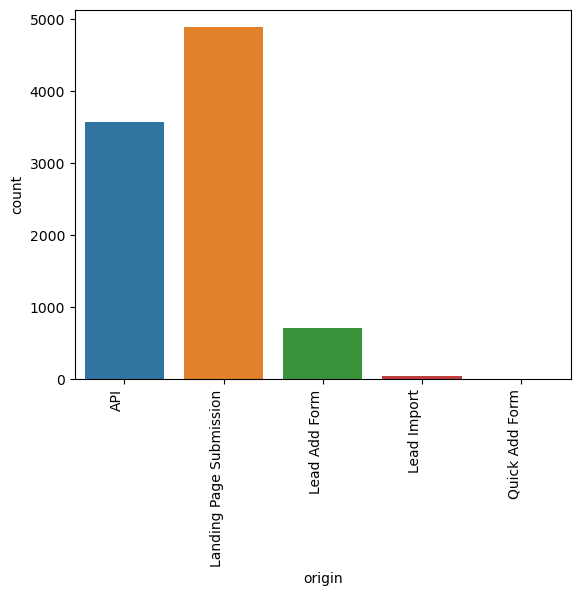

In [781]:
ax = sns.countplot(x = lead_data.origin)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [782]:
# Let us replace Lead Import and Quick Add Form with others
lead_data["origin"] = lead_data.origin.apply(lambda x: "other" if x == "Lead Import" or x == "Quick Add Form" else x)

In [783]:
lead_data.origin.value_counts()

origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
other                        56
Name: count, dtype: int64

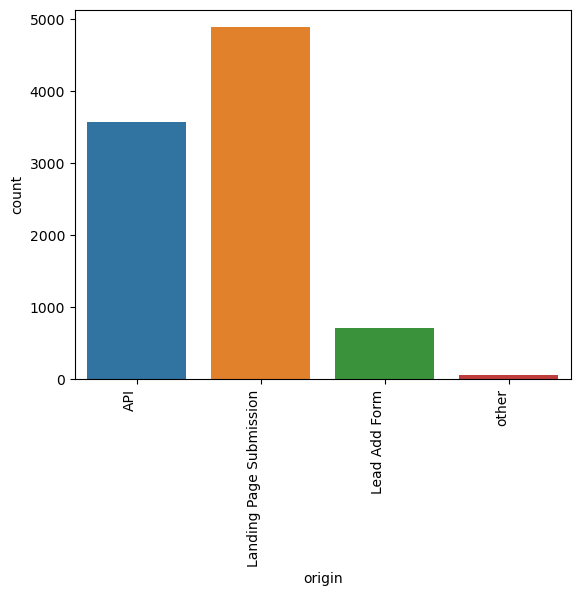

In [784]:
ax = sns.countplot(x = lead_data.origin)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

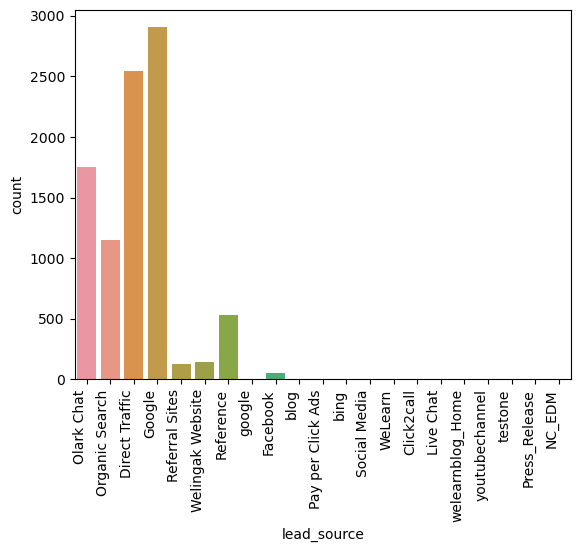

In [785]:
ax = sns.countplot(x = lead_data.lead_source)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [786]:
lead_data.lead_source.value_counts()

lead_source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [787]:
# Replace very low frequent value with others
sources = ["Google",
          "Direct Traffic",
          "Olark Chat",
          "Organic Search",
          "Reference"]
lead_data["lead_source"] = lead_data.lead_source.apply(lambda x: x if x in sources else "others")

In [788]:
lead_data.lead_source.isna().sum()

0

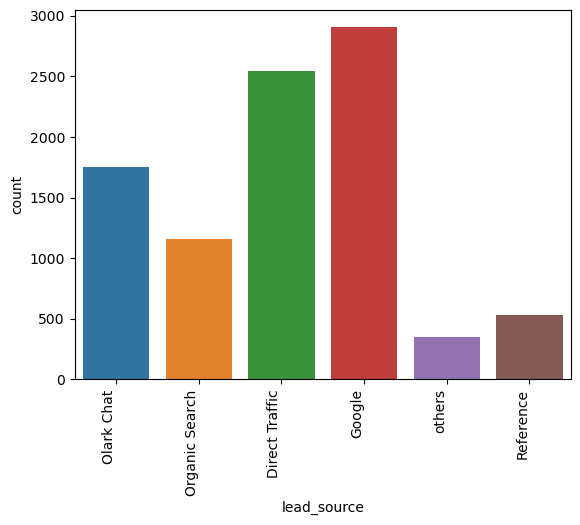

In [789]:
ax = sns.countplot(x = lead_data.lead_source)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

<Axes: xlabel='send_email', ylabel='count'>

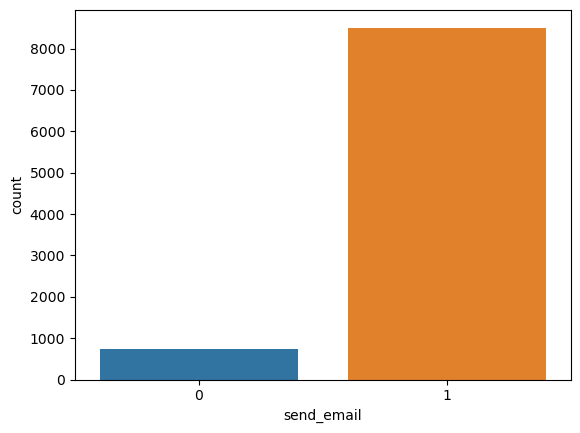

In [790]:
sns.countplot(x = lead_data.send_email)


<Axes: xlabel='call', ylabel='count'>

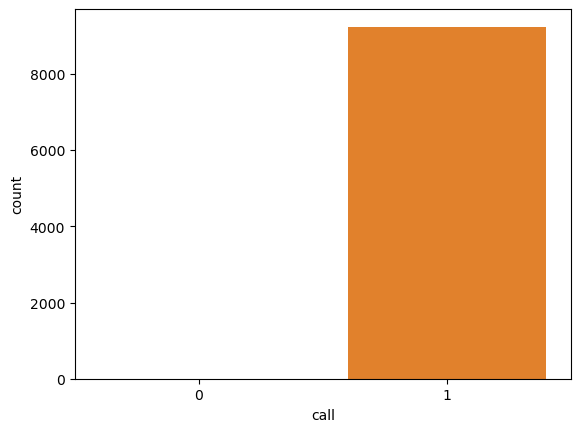

In [791]:
sns.countplot(x = lead_data.call)

In [792]:
# Let us drop this column as almost all the values are same
lead_data.drop(columns = ["call"], axis = 1, inplace = True)
lead_data.shape

(9240, 12)

<Axes: xlabel='Converted', ylabel='count'>

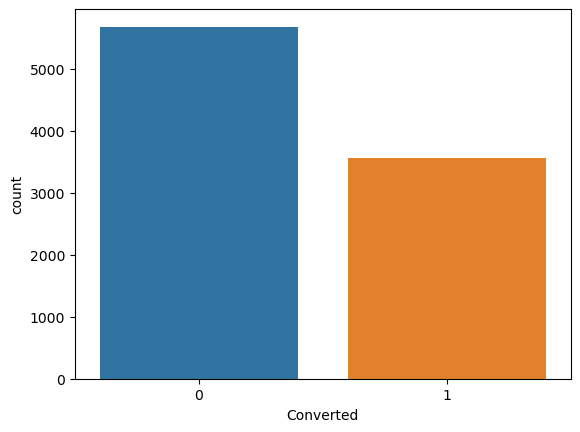

In [793]:
sns.countplot(x = lead_data.Converted)

In [794]:
#Total converted percentage
print(lead_data.Converted.sum() / len(lead_data.Converted))

0.3853896103896104


<Axes: >

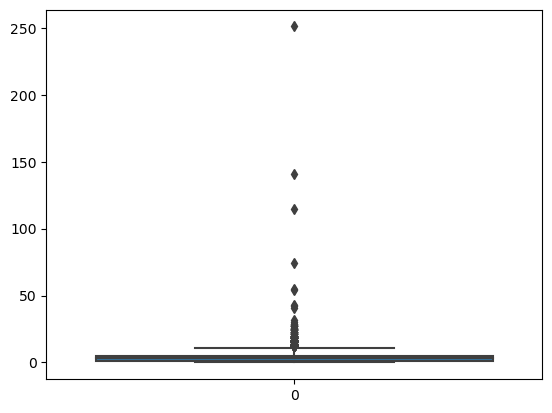

In [795]:
sns.boxplot(lead_data.TotalVisits)

In [796]:
lead_data.TotalVisits.describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [797]:
lead_data.TotalVisits.quantile(0.98)

13.0

Let us take till 98th percentile here

In [798]:
lead_data = lead_data[lead_data.TotalVisits < lead_data.TotalVisits.quantile(0.98)]
lead_data.shape

(9018, 12)

In [799]:
lead_data.TotalVisits.describe()

count    9018.000000
mean        3.030827
std         2.634461
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: TotalVisits, dtype: float64

/Users/keshavraj/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


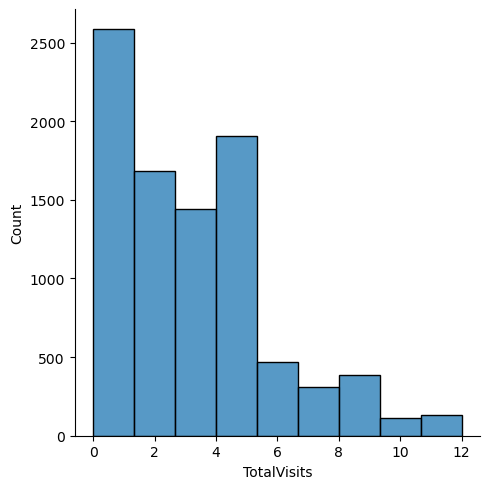

In [800]:
sns.displot(lead_data.TotalVisits, bins = 9)

Here 0 times site visit are there for almost 2500 leads. Let us see if it is because a lot of leads are from other sources too.

In [801]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9018 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lead Number                        9018 non-null   int64  
 1   origin                             9018 non-null   object 
 2   lead_source                        9018 non-null   object 
 3   send_email                         9018 non-null   int64  
 4   Converted                          9018 non-null   int64  
 5   TotalVisits                        9018 non-null   float64
 6   time_spent                         9018 non-null   int64  
 7   num_page_per_visit                 9018 non-null   float64
 8   last_activity                      9018 non-null   object 
 9   was_recommended                    9018 non-null   int64  
 10  free_copy_mastering_the_interview  9018 non-null   int64  
 11  last_notable_activity              9018 non-null   object 
dt

<Axes: >

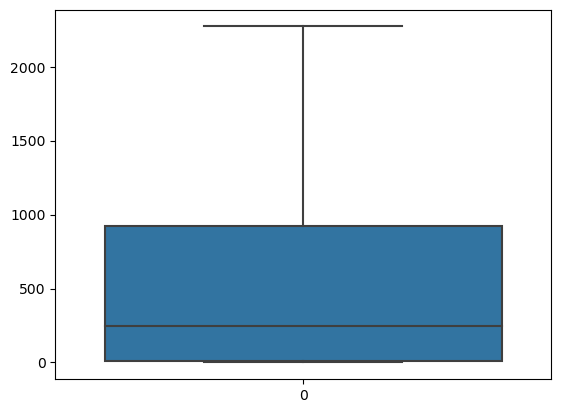

In [802]:
sns.boxplot(lead_data.time_spent)

In [803]:
lead_data.time_spent.describe()

count    9018.000000
mean      482.138612
std       546.405287
min         0.000000
25%         7.000000
50%       244.000000
75%       923.750000
max      2272.000000
Name: time_spent, dtype: float64

In [804]:
lead_data.time_spent.quantile(0.98)

1732.0

In [805]:
lead_data = lead_data[lead_data.time_spent < lead_data.time_spent.quantile(0.98)]

In [806]:
lead_data.shape

(8836, 12)

In [807]:
lead_data.time_spent.describe()

count    8836.000000
mean      453.544251
std       513.710979
min         0.000000
25%         2.000000
50%       234.000000
75%       866.000000
max      1730.000000
Name: time_spent, dtype: float64

/Users/keshavraj/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


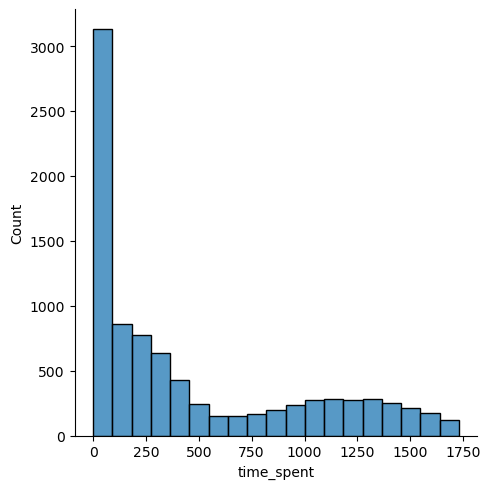

In [808]:
sns.displot(lead_data.time_spent, bins = 19)

<Axes: >

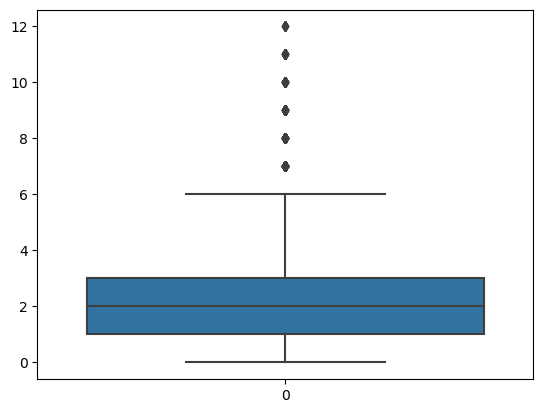

In [809]:
sns.boxplot(lead_data.num_page_per_visit)

In [810]:
lead_data.num_page_per_visit.describe()

count    8836.000000
mean        2.267232
std         1.963538
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: num_page_per_visit, dtype: float64

In [811]:
lead_data.shape

(8836, 12)

In [812]:
lead_data = lead_data[lead_data.num_page_per_visit < lead_data.num_page_per_visit.quantile(0.98)]

In [813]:
lead_data.shape

(8545, 12)

In [814]:
lead_data.num_page_per_visit.describe()

count    8545.000000
mean        2.067087
std         1.646971
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: num_page_per_visit, dtype: float64

/Users/keshavraj/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


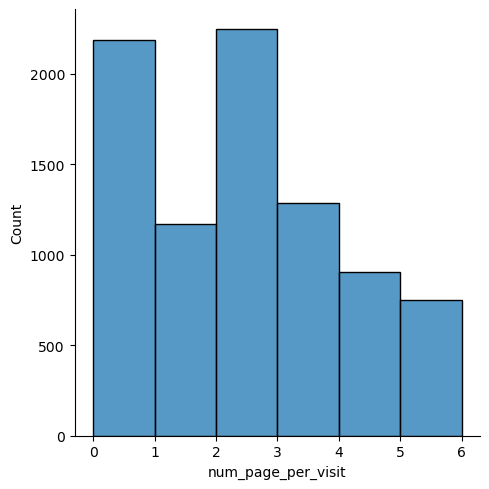

In [815]:
sns.displot(lead_data.num_page_per_visit, bins = 6)

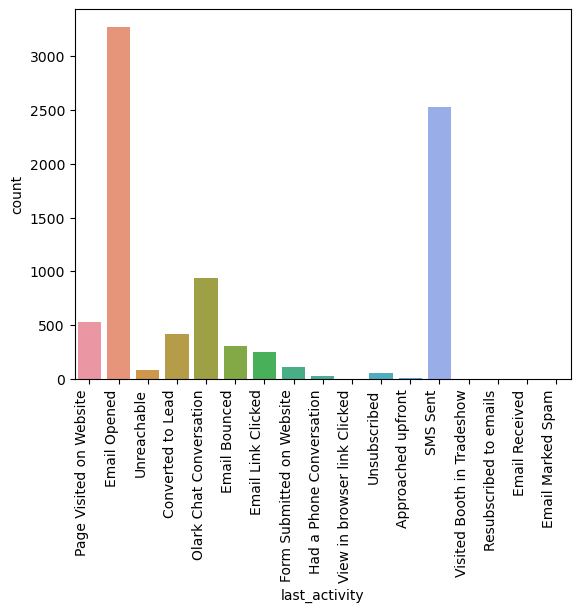

In [816]:
ax = sns.countplot(x = lead_data.last_activity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [817]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8545 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lead Number                        8545 non-null   int64  
 1   origin                             8545 non-null   object 
 2   lead_source                        8545 non-null   object 
 3   send_email                         8545 non-null   int64  
 4   Converted                          8545 non-null   int64  
 5   TotalVisits                        8545 non-null   float64
 6   time_spent                         8545 non-null   int64  
 7   num_page_per_visit                 8545 non-null   float64
 8   last_activity                      8545 non-null   object 
 9   was_recommended                    8545 non-null   int64  
 10  free_copy_mastering_the_interview  8545 non-null   int64  
 11  last_notable_activity              8545 non-null   object 
dt

In [819]:
lead_data.last_activity.value_counts()

last_activity
Email Opened                    3270
SMS Sent                        2526
Olark Chat Conversation          942
Page Visited on Website          529
Converted to Lead                418
Email Bounced                    309
Email Link Clicked               253
Form Submitted on Website        109
Unreachable                       88
Unsubscribed                      58
Had a Phone Conversation          25
Approached upfront                 9
View in browser link Clicked       4
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Email Marked Spam                  1
Name: count, dtype: int64

Let us move all the activities having frequency less than 250 to others

In [822]:
activities = ["Email Opened",
             "SMS Sent",
             "Olark Chat Conversation",
             "Page Visited on Website",
             "Converted to Lead",
             "Email Bounced",
             "Email Link Clicked"]
lead_data["last_activity"] = lead_data.last_activity.apply(lambda x: x if x in activities else "others")
lead_data.last_activity.describe()

count             8545
unique               8
top       Email Opened
freq              3270
Name: last_activity, dtype: object

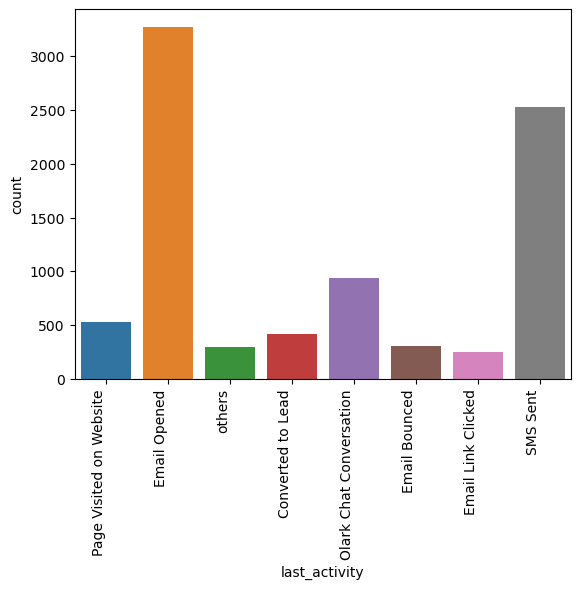

In [823]:
ax = sns.countplot(x = lead_data.last_activity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

<Axes: xlabel='was_recommended', ylabel='count'>

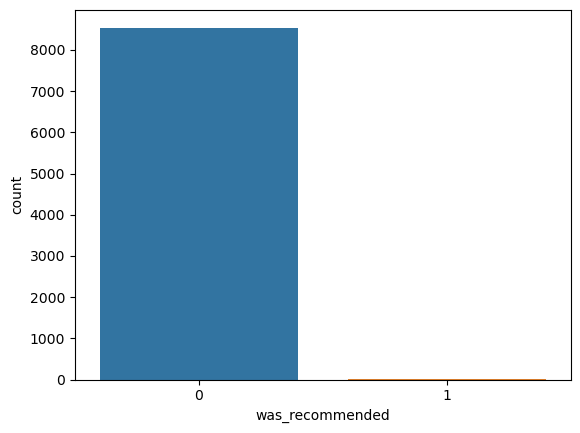

In [825]:
sns.countplot(x=lead_data.was_recommended)

In [826]:
#dropping this column as maximum values are same i.e. no
lead_data.drop(columns = ["was_recommended"], axis = 1, inplace = True)

Index(['Lead Number', 'origin', 'lead_source', 'send_email', 'Converted',
       'TotalVisits', 'time_spent', 'num_page_per_visit', 'last_activity',
       'free_copy_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [828]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8545 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lead Number                        8545 non-null   int64  
 1   origin                             8545 non-null   object 
 2   lead_source                        8545 non-null   object 
 3   send_email                         8545 non-null   int64  
 4   Converted                          8545 non-null   int64  
 5   TotalVisits                        8545 non-null   float64
 6   time_spent                         8545 non-null   int64  
 7   num_page_per_visit                 8545 non-null   float64
 8   last_activity                      8545 non-null   object 
 9   free_copy_mastering_the_interview  8545 non-null   int64  
 10  last_notable_activity              8545 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 801.1+ KB


<Axes: xlabel='free_copy_mastering_the_interview', ylabel='count'>

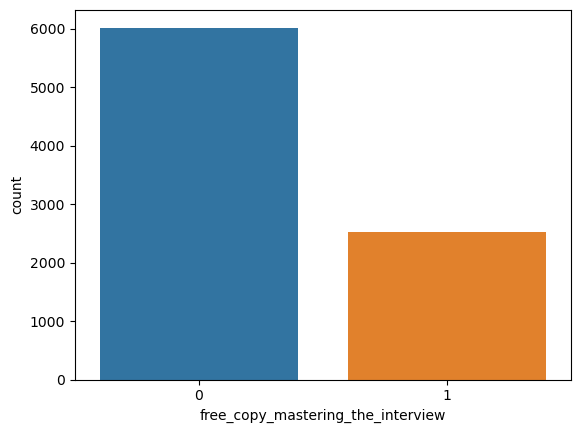

In [829]:
sns.countplot(x = lead_data.free_copy_mastering_the_interview )

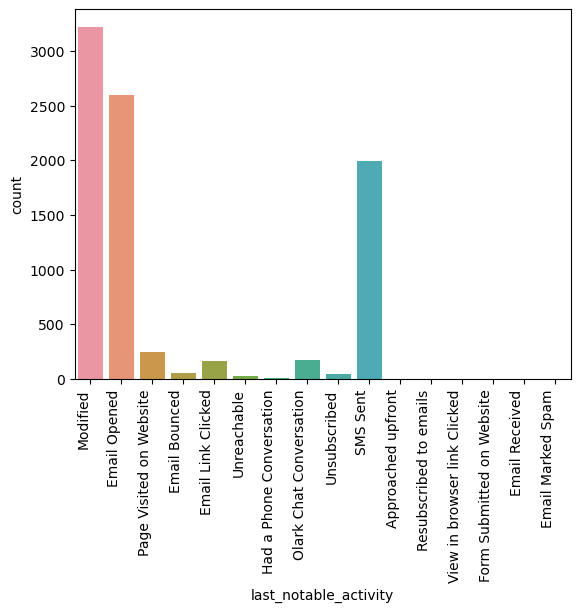

In [830]:
ax = sns.countplot(x = lead_data.last_notable_activity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [831]:
last_notable_activity = ["Modified",
                        "Email Opened",
                        "SMS Sent"]
lead_data["last_notable_activity"] = lead_data.last_notable_activity.apply(lambda x: x if x in last_notable_activity else "other")

In [832]:
lead_data.last_notable_activity.describe()

count         8545
unique           4
top       Modified
freq          3219
Name: last_notable_activity, dtype: object

In [833]:
lead_data.last_notable_activity.value_counts()

last_notable_activity
Modified        3219
Email Opened    2601
SMS Sent        1997
other            728
Name: count, dtype: int64

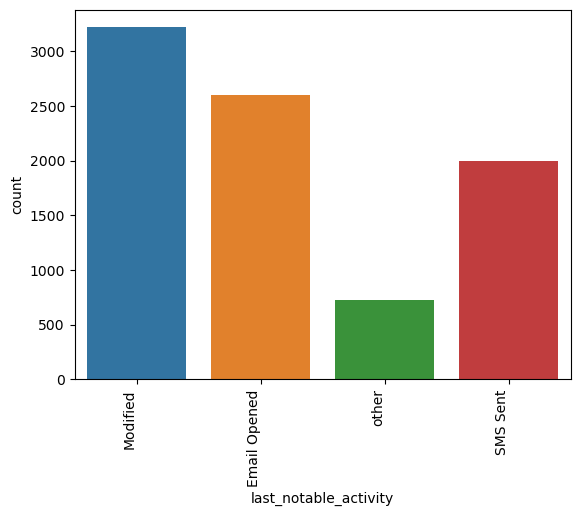

In [834]:
ax = sns.countplot(x = lead_data.last_notable_activity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [ ]:
lead_data.course_value.describe()

In [ ]:
lead_data["course_value"] = lead_data.course_value.fillna("Better Career Prospects")

In [ ]:
lead_data.course_value.describe()

In [ ]:
lead_data.info()

In [ ]:
lead_data.was_recommended.value_counts()

In [ ]:
ax = sns.countplot(x = lead_data.Tags)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

Here also we seem to have a clear winner to fill the missing values

In [ ]:
lead_data.Tags.describe()

In [ ]:
lead_data["Tags"] = lead_data.Tags.fillna("Will revert after reading the email")

In [ ]:
lead_data.Tags.describe()

In [ ]:
ax = sns.countplot(x = lead_data.City)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [ ]:
calc_null_percent(lead_data.City)

Dropping this columns as there are 41% missing values. Also since it is an online course city doesn't matter much. 

In [ ]:
lead_data = lead_data.drop(columns = ["City"], axis = 1)

In [ ]:
lead_data.info()

In [ ]:
calc_null_percent(lead_data.asymetric_activity_index)

Dropping asymetric_activity_index to asymmetric_profile_score  due to very high missing value percentage.

In [ ]:
drop_columns = ["asymetric_activity_index",
               "asymmetric_profile_index",
               "asymmetric_activity_score",
                "asymmetric_profile_score"
               ]
lead_data = lead_data.drop(columns = drop_columns, axis = 1)

In [ ]:
lead_data.info()

In [ ]:
ax = sns.countplot(x = lead_data.last_notable_activity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [ ]:
ax = sns.countplot(x = lead_data.lead_source)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

Let us delete rows for na values in lead_source

In [ ]:
lead_data = lead_data[lead_data["lead_source"].notna()]

In [ ]:
lead_data.shape

In [ ]:
lead_data.info()